1. Importing  Libraries and Defining MobiusStrip Class

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Class Definition: Model Möbius Strip Geometry ===
class MobiusStrip:
    
    # --- 2. Initialize Parameters & Generate Parameter Grid ---
    def __init__(self, R=1.0, w=0.5, n=100):
        """
        Set radius (R), width (w), and mesh resolution (n).
        Create parameter grids (u,v) for surface mapping.
        """
        self.R = R
        self.w = w
        self.n = n
        
        # Create meshgrid of parameters u and v to define points on the strip
        self.u, self.v = np.meshgrid(
            np.linspace(0, 2 * np.pi, n),
            np.linspace(-w / 2, w / 2, n)
        )
        
        # Compute 3D coordinates based on parametric equations
        self.x, self.y, self.z = self._compute_coordinates()

    # --- 3. Compute 3D Coordinates Using Parametric Equations ---
    def _compute_coordinates(self):
        """
        Calculate x, y, z points on the Möbius strip surface.
        """
        u, v = self.u, self.v
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    # --- 4. Return Surface Mesh (x, y, z) for Visualization or Analysis ---
    def surface_mesh(self):
        """
        Provide the computed 3D mesh grid of points on the surface.
        """
        return self.x, self.y, self.z

    # --- 5. Numerically Approximate Surface Area of the Möbius Strip ---
    def surface_area(self):
        """
        Use numerical integration of the differential surface element
        computed from cross product of surface partial derivatives.
        """
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Partial derivatives w.r.t u and v
        xu = np.gradient(self.x, du, axis=1)
        xv = np.gradient(self.x, dv, axis=0)
        yu = np.gradient(self.y, du, axis=1)
        yv = np.gradient(self.y, dv, axis=0)
        zu = np.gradient(self.z, du, axis=1)
        zv = np.gradient(self.z, dv, axis=0)

        # Cross product of tangent vectors at each grid point
        cross_x = yu * zv - zu * yv
        cross_y = zu * xv - xu * zv
        cross_z = xu * yv - yu * xv

        # Magnitude of cross product = local surface area element
        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        # Sum over mesh grid to approximate total surface area
        return np.sum(dA) * du * dv

    # --- 6. Calculate Length of Edge Curve Numerically ---
    def edge_length(self):
        """
        Compute the length of the Möbius strip boundary curve along v = w/2.
        """
        x_edge = self.x[-1, :]
        y_edge = self.y[-1, :]
        z_edge = self.z[-1, :]

        # Distances between consecutive edge points
        dx = np.diff(x_edge)
        dy = np.diff(y_edge)
        dz = np.diff(z_edge)
        segment_lengths = np.sqrt(dx**2 + dy**2 + dz**2)

        # Sum of segment lengths = total edge length
        return np.sum(segment_lengths)

    # --- 7. Visualize the Möbius Strip with 3D Plot ---
    def plot(self):
        """
        Render a 3D surface plot of the Möbius strip using matplotlib.
        """
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, cmap='viridis', edgecolor='k', alpha=0.9)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()


Creating MobiusStrip Object, Calculate & Pl

Surface Area: 3.1915
Edge Length: 6.3332


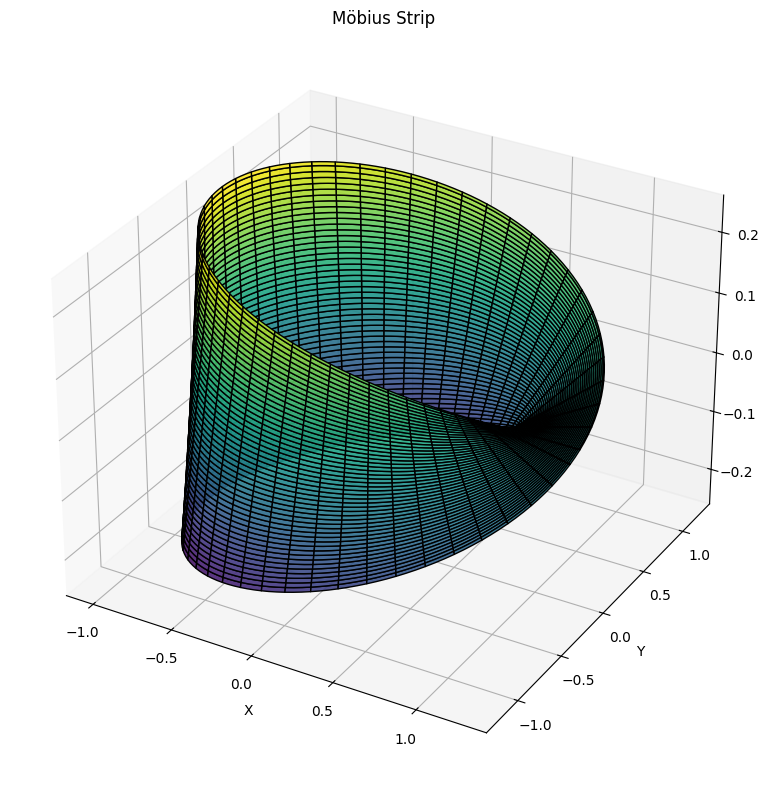

In [33]:
# Initialize MobiusStrip object
mobius = MobiusStrip(R=1.0, w=0.5, n=150)

# Calculate surface area
print(f"Surface Area: {mobius.surface_area():.4f}")

# Calculate edge length
print(f"Edge Length: {mobius.edge_length():.4f}")

# Plot the Mobius strip
mobius.plot()


